In [ ]:
import pandas as pd

In [110]:
data = pd.read_csv('Dataset_A_loan.csv')

In [111]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

#Splitting data

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x = data.drop('loan_status', axis=1)
y = data['loan_status']

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state =42)

#Things to Note

There are outliers in every numerical column the dataset has. I did not fix these outliers because Random Forest and XGboost are tree structures, they are robust to outliers. They isolate the outliers into seperate branches wihtout significantly affecting the rest of the model's structure or performance.

The person_age, loan_amnt, and cb_person_cred_hist_length columns are actually whole numbers but are in the form of a float. I did not change the data type to int because tree_based model treat floats and ints the same way.

<Axes: >

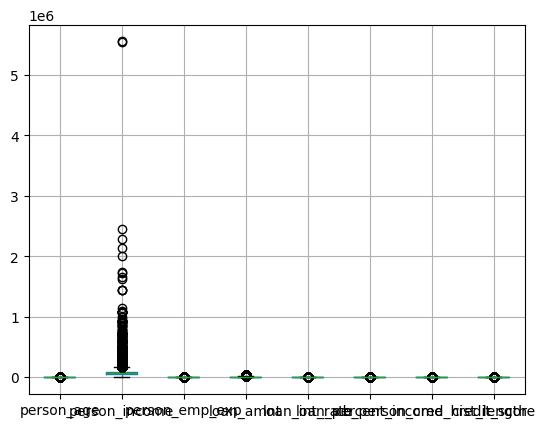

In [116]:
data.boxplot(['person_age', 'person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score'])

In [117]:
data.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


To check if the floats are actual whole numbers or not if it returns true it means all the float points are .0

In [118]:
print((data['person_age'] % 1 == 0).all())
print((data['person_income'] % 1 == 0).all())
print((data['loan_amnt'] % 1 == 0).all())
print((data['loan_int_rate'] % 1 == 0).all())
print((data['loan_percent_income'] % 1 == 0).all())
print((data['cb_person_cred_hist_length'] % 1 == 0).all())

True
False
True
False
False
True


#Imputing missing values

In [119]:
missing = data.isnull().sum()
missingC = missing[missing > 0]

print("Columns with missing values:")
print(missingC)

Columns with missing values:
person_income    2250
dtype: int64


<Axes: >

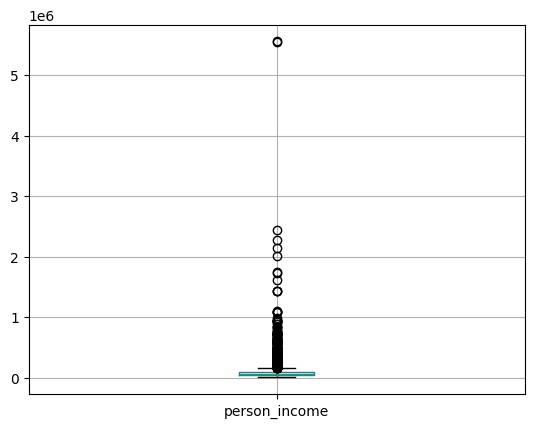

In [120]:
x_train.boxplot(['person_income'])

In [121]:
x_train['person_income'] = x_train['person_income'].fillna(x_train['person_income'].median())
x_test['person_income']=x_test['person_income'].fillna(x_test['person_income'].median())

In [122]:
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36000 entries, 6048 to 44095
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36000 non-null  float64
 1   person_gender                   36000 non-null  object 
 2   person_education                36000 non-null  object 
 3   person_income                   36000 non-null  float64
 4   person_emp_exp                  36000 non-null  int64  
 5   person_home_ownership           36000 non-null  object 
 6   loan_amnt                       36000 non-null  float64
 7   loan_intent                     36000 non-null  object 
 8   loan_int_rate                   36000 non-null  float64
 9   loan_percent_income             36000 non-null  float64
 10  cb_person_cred_hist_length      36000 non-null  float64
 11  credit_score                    36000 non-null  int64  
 12  previous_loan_defaults_on_file  36

#Encoding
person_gender -> binary

person_education -> ordinal

person_home_ownership -> ohe

loan_intent -> ohe

previous_loan_defaults_on_file -> binary

In [123]:
x_train['person_gender'].unique()

array(['male', 'female', 'Male', 'fe male'], dtype=object)

In [124]:
x_train['person_gender'] = x_train['person_gender'].str.replace(" ", "")
x_test['person_gender'] = x_test['person_gender'].str.replace(" ", "")

In [125]:
x_train['person_gender'].unique()

array(['male', 'female', 'Male'], dtype=object)

In [126]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36000 entries, 6048 to 44095
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36000 non-null  float64
 1   person_gender                   36000 non-null  object 
 2   person_education                36000 non-null  object 
 3   person_income                   36000 non-null  float64
 4   person_emp_exp                  36000 non-null  int64  
 5   person_home_ownership           36000 non-null  object 
 6   loan_amnt                       36000 non-null  float64
 7   loan_intent                     36000 non-null  object 
 8   loan_int_rate                   36000 non-null  float64
 9   loan_percent_income             36000 non-null  float64
 10  cb_person_cred_hist_length      36000 non-null  float64
 11  credit_score                    36000 non-null  int64  
 12  previous_loan_defaults_on_file  36

In [127]:
x_train['person_gender'] = x_train['person_gender'].replace({"Male" : "male"})
x_test['person_gender'] = x_test['person_gender'].replace({"Male" : "male"})

In [128]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36000 entries, 6048 to 44095
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36000 non-null  float64
 1   person_gender                   36000 non-null  object 
 2   person_education                36000 non-null  object 
 3   person_income                   36000 non-null  float64
 4   person_emp_exp                  36000 non-null  int64  
 5   person_home_ownership           36000 non-null  object 
 6   loan_amnt                       36000 non-null  float64
 7   loan_intent                     36000 non-null  object 
 8   loan_int_rate                   36000 non-null  float64
 9   loan_percent_income             36000 non-null  float64
 10  cb_person_cred_hist_length      36000 non-null  float64
 11  credit_score                    36000 non-null  int64  
 12  previous_loan_defaults_on_file  36

In [ ]:
x_train['person_gender'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
x_train['person_gender'] = x_train['person_gender'].map({"male" : 0, "female" : 1})
x_test['person_gender'] = x_test['person_gender'].map({"male" : 0, "female" : 1})

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36000 entries, 6048 to 44095
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36000 non-null  float64
 1   person_gender                   36000 non-null  int64  
 2   person_education                36000 non-null  object 
 3   person_income                   36000 non-null  float64
 4   person_emp_exp                  36000 non-null  int64  
 5   person_home_ownership           36000 non-null  object 
 6   loan_amnt                       36000 non-null  float64
 7   loan_intent                     36000 non-null  object 
 8   loan_int_rate                   36000 non-null  float64
 9   loan_percent_income             36000 non-null  float64
 10  cb_person_cred_hist_length      36000 non-null  float64
 11  credit_score                    36000 non-null  int64  
 12  previous_loan_defaults_on_file  36

In [ ]:
x_train['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:

oe = OrdinalEncoder(categories=[['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']])

x_train[['person_education']] = oe.fit_transform(x_train[['person_education']])
x_test[['person_education']] = oe.transform(x_test[['person_education']])


In [ ]:
x_train['person_education'].unique()

array([3., 0., 2., 1., 4.])

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36000 entries, 6048 to 44095
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36000 non-null  float64
 1   person_gender                   36000 non-null  int64  
 2   person_education                36000 non-null  float64
 3   person_income                   36000 non-null  float64
 4   person_emp_exp                  36000 non-null  int64  
 5   person_home_ownership           36000 non-null  object 
 6   loan_amnt                       36000 non-null  float64
 7   loan_intent                     36000 non-null  object 
 8   loan_int_rate                   36000 non-null  float64
 9   loan_percent_income             36000 non-null  float64
 10  cb_person_cred_hist_length      36000 non-null  float64
 11  credit_score                    36000 non-null  int64  
 12  previous_loan_defaults_on_file  36

In [ ]:
data['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encodedPHOtrain = ohe.fit_transform(x_train[['person_home_ownership']])
encodedPHOtest = ohe.transform(x_test[['person_home_ownership']])

encodedPHOtrain2 = pd.DataFrame(encodedPHOtrain, columns=ohe.get_feature_names_out(['person_home_ownership']))
encodedPHOtest2 = pd.DataFrame(encodedPHOtest, columns=ohe.get_feature_names_out(['person_home_ownership']))

x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

x_train = pd.concat([x_train, encodedPHOtrain2], axis=1).drop(['person_home_ownership'], axis=1)
x_test = pd.concat([x_test, encodedPHOtest2], axis=1).drop(['person_home_ownership'], axis=1)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36000 non-null  float64
 1   person_gender                   36000 non-null  int64  
 2   person_education                36000 non-null  float64
 3   person_income                   36000 non-null  float64
 4   person_emp_exp                  36000 non-null  int64  
 5   loan_amnt                       36000 non-null  float64
 6   loan_intent                     36000 non-null  object 
 7   loan_int_rate                   36000 non-null  float64
 8   loan_percent_income             36000 non-null  float64
 9   cb_person_cred_hist_length      36000 non-null  float64
 10  credit_score                    36000 non-null  int64  
 11  previous_loan_defaults_on_file  36000 non-null  object 
 12  person_home_ownership_MORTGAGE  

In [ ]:
x_train['loan_intent'].unique()

array(['VENTURE', 'MEDICAL', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION', 'EDUCATION'], dtype=object)

In [ ]:
encodedLItrain = ohe.fit_transform(x_train[['loan_intent']])
encodedLItest = ohe.transform(x_test[['loan_intent']])

encodedLItrain2 = pd.DataFrame(encodedLItrain, columns=ohe.get_feature_names_out(['loan_intent']))
encodedLItest2 = pd.DataFrame(encodedLItest, columns=ohe.get_feature_names_out(['loan_intent']))

x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

x_train = pd.concat([x_train, encodedLItrain2], axis=1).drop(['loan_intent'], axis=1)
x_test = pd.concat([x_test, encodedLItest2], axis=1).drop(['loan_intent'], axis=1)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36000 non-null  float64
 1   person_gender                   36000 non-null  int64  
 2   person_education                36000 non-null  float64
 3   person_income                   36000 non-null  float64
 4   person_emp_exp                  36000 non-null  int64  
 5   loan_amnt                       36000 non-null  float64
 6   loan_int_rate                   36000 non-null  float64
 7   loan_percent_income             36000 non-null  float64
 8   cb_person_cred_hist_length      36000 non-null  float64
 9   credit_score                    36000 non-null  int64  
 10  previous_loan_defaults_on_file  36000 non-null  object 
 11  person_home_ownership_MORTGAGE  36000 non-null  float64
 12  person_home_ownership_OTHER     

In [ ]:
x_train["previous_loan_defaults_on_file"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
x_train['previous_loan_defaults_on_file'] = x_train['previous_loan_defaults_on_file'].map({"No" : 0, "Yes" : 1})
x_test['previous_loan_defaults_on_file'] = x_test['previous_loan_defaults_on_file'].map({"No" : 0, "Yes" : 1})

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36000 non-null  float64
 1   person_gender                   36000 non-null  int64  
 2   person_education                36000 non-null  float64
 3   person_income                   36000 non-null  float64
 4   person_emp_exp                  36000 non-null  int64  
 5   loan_amnt                       36000 non-null  float64
 6   loan_int_rate                   36000 non-null  float64
 7   loan_percent_income             36000 non-null  float64
 8   cb_person_cred_hist_length      36000 non-null  float64
 9   credit_score                    36000 non-null  int64  
 10  previous_loan_defaults_on_file  36000 non-null  int64  
 11  person_home_ownership_MORTGAGE  36000 non-null  float64
 12  person_home_ownership_OTHER     

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
data['loan_status'].unique()

array([1, 0])

In [ ]:
print('\nClassification Report Random Forest\n')
print(classification_report(y_test, y_pred, target_names=['0', '1']))


Classification Report Random Forest

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7000
           1       0.90      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



#XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(
    learning_rate =0.05,
    n_estimators=500,
    max_depth=5).fit(x_train, y_train)

In [ ]:
y_pred2 = xgb.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred2, target_names=['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7000
           1       0.91      0.79      0.85      2000

    accuracy                           0.94      9000
   macro avg       0.93      0.89      0.90      9000
weighted avg       0.94      0.94      0.94      9000



XGB is the better model out of the two with the evaluation metric being the F1 score because the dataset is imbalanced so accuracy is not reliable.

In [ ]:
from sklearn.pipeline import Pipeline
import pickle

In [ ]:
with open('xgb.pkl','wb') as file:
    pickle.dump(xgb,file)

In [ ]:
with open('ohe.pkl', 'wb') as file:
  pickle.dump(ohe, file)

with open('oe.pkl', 'wb') as file:
  pickle.dump(oe, file)